# Plot for E-GEOD-33245 (cbrB vs WT)

This notebook is creating volcano plots that highlight the ArgR regulon, which are the genes selected based on the SOPHIE analysis to be specific. These plots will correspond to the wet lab experiments conducted by the Hogan Lab.

In [1]:
%load_ext autoreload

import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ponyo import utils

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(), "../"))

config_filename = os.path.abspath(
    os.path.join(base_dir, "configs", "config_pseudomonas_33245.tsv")
)

params = utils.read_config(config_filename)

In [3]:
# Load config params
local_dir = params["local_dir"]
dataset_name = params["dataset_name"]
project_id = params["project_id"]
num_simulated = params["num_simulated"]

In [4]:
# Load DE stats
template_summary_filename = os.path.join(
    base_dir, dataset_name, f"generic_gene_summary_{project_id}_cbrB_v_WT.tsv"
)

In [5]:
# Load argR genes
# These were the selected specific genes used in the wet lab experiments
argR_genes_filename = os.path.join("data", "ArgR.csv")

In [6]:
argR_genes = list(pd.read_csv(argR_genes_filename, index_col=0, header=0).index)

## Plotting functions

In [7]:
def make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    y_stat,
    genes_to_highlight,
    output_figure_filename,
):
    """
    This function creates volcano plot of template experiment
    highlighting traditional DEGs

    Arguments
    ----------
    template_DE_stats_filename: str
        File containing summary statistics for template experiment
    project_id: str
        Experiment identifier
    y_stat: 'adj.P.Val' or 'Z score'
    genes_to_highlight: list
        List of genes ids to highlight
    output_figure_filename: str
        File to save figure to
    """

    # Read template DE stats
    template_summary_df = pd.read_csv(
        template_summary_filename, sep="\t", index_col=0, header=0
    )

    if y_stat == "adj.P.Val":
        # Take -log10 of adjusted p-value
        template_summary_df["padj_log10"] = -np.log10(
            template_summary_df["Adj P-value (Real)"]
        )

    # Label genes in input list
    template_summary_df["gene group"] = "none"
    template_summary_df.loc[genes_to_highlight, "gene group"] = "ArgR genes"

    # Plot
    # Note: Tried to use
    # hue="gene group",
    # hue_order=["none", "ArgR genes"]
    # parameters but
    # the genes I want to highlight still seem to be covered
    # for some reason so I have switched to plot them separately instead
    if y_stat == "adj.P.Val":
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "none"],
            x="logFC (Real)",
            y="padj_log10",
            hue="gene group",
            alpha=0.5,
            palette=["lightgrey"],
            linewidth=0,
            legend=False,
        )
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "ArgR genes"],
            x="logFC (Real)",
            y="padj_log10",
            hue="gene group",
            alpha=0.5,
            palette=["red"],
            linewidth=0,
        )

        # Add traditional thresholds
        f.axhline(-np.log10(0.05), c="black", lw=0.7, ls="--")
        f.axvline(1, c="black", lw=0.7, ls="--")
        f.axvline(-1, c="black", lw=0.7, ls="--")

        # Move location of legend
        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

        f.set_ylabel(
            r"-log$_{10}$ (FDR adjusted p-value)", fontsize=14, fontname="Verdana"
        )
    else:
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "none"],
            x="logFC (Real)",
            y="Z score",
            hue="gene group",
            alpha=0.5,
            palette=["lightgrey"],
            linewidth=0,
            legend=False,
        )
        f = sns.scatterplot(
            data=template_summary_df[template_summary_df["gene group"] == "ArgR genes"],
            x="logFC (Real)",
            y="Z score",
            hue="gene group",
            alpha=0.5,
            palette=["red"],
            linewidth=0,
        )
        f.set_ylabel("Specificity score (z-score)", fontsize=14, fontname="Verdana")

        # Move location of legend
        plt.legend(bbox_to_anchor=(1.01, 1), loc=2, borderaxespad=0.0)

    f.set_xlabel(r"log$_2$ Fold Change", fontsize=14, fontname="Verdana")
    f.set_title(f"Template experiment ({project_id})", fontsize=16, fontname="Verdana")

    f.figure.savefig(
        output_figure_filename,
        format="svg",
        bbox_inches="tight",
        transparent=True,
        pad_inches=0,
        dpi=300,
    )

In [8]:
len(argR_genes)

37

## logFC vs p-value

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/font_manager.py:1238: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


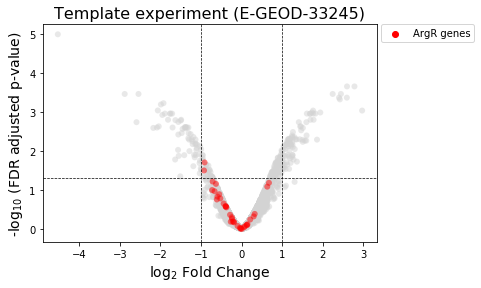

In [9]:
make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    "adj.P.Val",
    argR_genes,
    os.path.join(local_dir, f"template_traditional_volcano_ArgR_{project_id}.svg"),
)

## logFC vs z-score

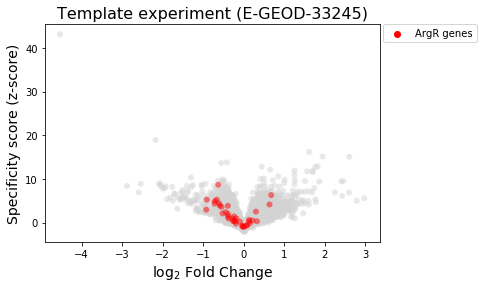

In [10]:
make_volcano_template_highlight_genelist(
    template_summary_filename,
    project_id,
    "z-score",
    argR_genes,
    os.path.join(local_dir, f"template_zscore_volcano_ArgR_{project_id}.svg"),
)